## Breast Cancer detection using Machine Learning Algorithms on Wisconsin (Diagnostic)

## In the dataset given Class 2 represent cancer is benign and Class 4 represent cancer is malignant.

In [382]:
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import seaborn as sb

In [419]:
#load data
url="https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']
data=pd.read_csv(url,names=names)


In [420]:
data.head(20)

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [421]:
data.shape

(699, 11)

In [422]:
data.describe()

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bland_chromatin,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DD82E09C48>,
      dtype=object)

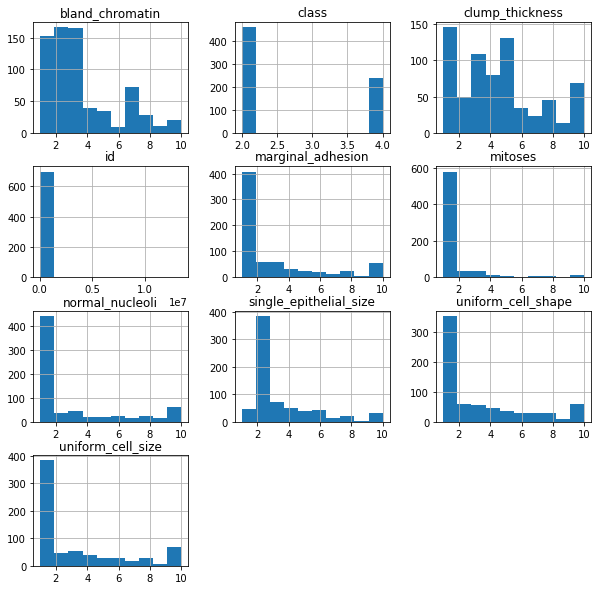

In [423]:
#Visualise all feautures
data.hist(figsize=(10,10))

In [424]:
df=data.drop('id',axis=1)
df.skew()

clump_thickness           0.592859
uniform_cell_size         1.233137
uniform_cell_shape        1.161859
marginal_adhesion         1.524468
single_epithelial_size    1.712172
bland_chromatin           1.099969
normal_nucleoli           1.422261
mitoses                   3.560658
class                     0.654564
dtype: float64

In [425]:
#Skewedness affects the regression intercept, coefficients associated with the model.
skewed_column=[]
for i in range(len(df.skew())):
    if (df.skew()[i]>1) or (df.skew()[i]<-1):    
        skewed_column.append(df.skew().index[i])
print(skewed_column)

['uniform_cell_size', 'uniform_cell_shape', 'marginal_adhesion', 'single_epithelial_size', 'bland_chromatin', 'normal_nucleoli', 'mitoses']


In [426]:
df[skewed_column]=df[skewed_column].apply(lambda x: np.log(x+1))

In [427]:
df.skew()

clump_thickness           0.592859
uniform_cell_size         0.783525
uniform_cell_shape        0.672887
marginal_adhesion         1.024298
single_epithelial_size    0.993138
bland_chromatin           0.380531
normal_nucleoli           1.066723
mitoses                   2.698456
class                     0.654564
dtype: float64

In [428]:
df.replace('?',-99999, inplace=True)

In [429]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # default=(0, 1)
columns = df.columns
df[columns]=scaler.fit_transform(df[columns])

In [430]:
df_X=df.drop('class',axis=1)
df_y=df['class']

In [431]:
df_X.head()

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
0,0.444444,0.000000,0.000000,0.000000,0.237845,0.99991,0.406598,0.000000,0.0
1,0.444444,0.537493,0.537493,0.644443,0.813196,1.00000,0.406598,0.237845,0.0
2,0.222222,0.000000,0.000000,0.000000,0.237845,0.99992,0.406598,0.000000,0.0
3,0.555556,0.882287,0.882287,0.000000,0.406598,0.99994,0.406598,0.813196,0.0
4,0.333333,0.000000,0.000000,0.406598,0.237845,0.99991,0.406598,0.000000,0.0


In [432]:
df_y.head

<bound method NDFrame.head of 0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
694    0.0
695    0.0
696    1.0
697    1.0
698    1.0
Name: class, Length: 699, dtype: float64>

In [433]:
# Train test data splitting
X_train,X_test,y_train,y_test=train_test_split(df_X,df_y,test_size=0.2,random_state = 0)

In [434]:
def train_predict(model,X_train, y_train, X_test, y_test):
    results={}
    start=time()
    learner = model.fit(X_train,y_train)
    end = time()
    results['train_time'] = end-start
    start = time() # Get start time
    predictions_train=learner.predict(X_train)
    predictions_test = learner.predict(X_test)
    end = time() 
    results['prediction_time']=end-start
    results['train_accuracy'] = accuracy_score(y_train,predictions_train)
    results['test_accuracy'] = accuracy_score(y_test,predictions_test)
    results['fbeta_score']=fbeta_score(y_test,predictions_test, beta=2)
    return results

In [435]:
clf_A=SVC()
clf_B=KNeighborsClassifier()
print("SVC",train_predict(clf_A,X_train, y_train, X_test, y_test))

print("KNN",train_predict(clf_B,X_train, y_train, X_test, y_test))


SVC {'train_time': 0.00598597526550293, 'prediction_time': 0.006979703903198242, 'train_accuracy': 0.9695885509838998, 'test_accuracy': 0.9785714285714285, 'fbeta_score': 0.9782608695652172}
KNN {'train_time': 0.00299072265625, 'prediction_time': 0.05288958549499512, 'train_accuracy': 0.962432915921288, 'test_accuracy': 0.9642857142857143, 'fbeta_score': 0.948905109489051}


Out of Above two models, SVC is better to use as it achieves higher accuracy and F_beta score in lesser time.
Though Accuracy and F_beta score achieved is already higher, lets check whether results can be more improved using hypertuning

In [436]:
# Using Rbf Kernel
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
clf=SVC()
parameters={'kernel':['rbf'],'gamma':[0.5,1,2,2.5,4,5],'C': [0.001,0.01,0.1,0.5,1,2,5]}
scorer = make_scorer(fbeta_score,beta=2)
grid_obj = GridSearchCV(clf,parameters,scorer,refit=True)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train,y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_
# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)
print(grid_fit.best_params_)
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final f_beta score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions,beta=2)))


{'C': 1, 'gamma': 5, 'kernel': 'rbf'}
Final accuracy score on the testing data: 0.9643
Final f_beta score on the testing data: 0.9489


In [437]:
# Using Poly kernel
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
clf=SVC()
parameters={'kernel':['poly'],'degree':[0.5,1,2,2.5,4,5],'C': [0.001,0.01,0.1,0.25,0.4,0.5,1,2,5]}
scorer = make_scorer(fbeta_score,beta=2)
grid_obj = GridSearchCV(clf,parameters,scorer,refit=True)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train,y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_
# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)
print(grid_fit.best_params_)
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final fbeta_score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions,beta=2)))


{'C': 0.25, 'degree': 1, 'kernel': 'poly'}
Final accuracy score on the testing data: 0.9786
Final fbeta_score on the testing data: 0.9783


Though Accuracy and fbeta_score are not increased by hypertuning but still it can be concluded that SVC with "poly" kernel, degree 1 and C=0.25 achieve highest f_beta score and accuracy 

## Analysis of Feature Importance

For analysis of importance of features, lets fit the model taking one column at a time and checking accuracy and F_beta score

In [438]:
results=[]
columns=X_train.columns
m=X_train.shape[0]
n=X_test.shape[0]
for i in columns:
    clf_n=SVC()
    result=train_predict(clf_n,X_train[i].values.reshape(m,1),y_train, X_test[i].values.reshape(n,1), y_test)
    results.append(result)
X=pd.DataFrame(results,index=columns)
print(X)

                        train_time  prediction_time  train_accuracy  \
clump_thickness           0.008973         0.003991        0.855098   
uniform_cell_size         0.002031         0.003953        0.924866   
uniform_cell_shape        0.002994         0.000995        0.906977   
marginal_adhesion         0.002991         0.002992        0.864043   
single_epithelial_size    0.002991         0.001995        0.894454   
bare_nuclei               0.005980         0.004987        0.667263   
bland_chromatin           0.003990         0.001994        0.903399   
normal_nucleoli           0.002992         0.002992        0.898032   
mitoses                   0.002992         0.001995        0.790698   

                        test_accuracy  fbeta_score  
clump_thickness              0.871429     0.719844  
uniform_cell_size            0.921429     0.928571  
uniform_cell_shape           0.914286     0.925267  
marginal_adhesion            0.835714     0.759259  
single_epithelial_size  

From the above results It can be concluded that uniform_cell_shape and uniform_cell_size are most predictive features

Lets plot a violinplot to understand threshold value of uniform_cell_size which predict Belign and Malignant cancer

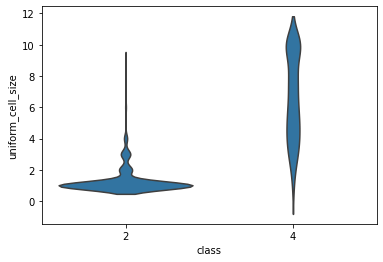

In [439]:
sb.violinplot(data=data,x=data["class"],y=data["uniform_cell_size"],inner=None, color=sb.color_palette()[0])

It can be seen lower uniform_cell_size less is for benign cancer while Higher uniform_cell_size is for malignant cancer

Check how much percentage of people having malignant cancer beyond a certain uniform_cell_size value

In [473]:
Malignant_analysis=[]
for i in range(1,data['uniform_cell_size'].max()):
    Malignant_analysis.append(np.sum((data['uniform_cell_size']>=i) & (data['class']==4))/np.sum(data['uniform_cell_size']>=i)*100)
X=pd.DataFrame(Malignant_analysis,columns=['% people having Malignant'])
X['uniform_cell_size greater than']=np.arange(1,10)
X.set_index('uniform_cell_size greater than',inplace=True)
print(X)

                                % people having Malignant
uniform_cell_size greater than                           
1                                               34.477825
2                                               75.238095
3                                               84.814815
4                                               93.577982
5                                               97.191011
6                                               96.621622
7                                               97.520661
8                                               98.039216
9                                               98.630137


Check how much percentage of people having benign cancer below certain uniform_cell_size value

In [477]:
Benign_analysis=[]
for i in range(2,data['uniform_cell_size'].max()):
    Benign_analysis.append(np.sum((data['uniform_cell_size']<=i) & (data['class']==2))/np.sum(data['uniform_cell_size']<=i)*100)
X=pd.DataFrame(Benign_analysis,columns=['% people having Benign'])
X['uniform_cell_size lower than']=np.arange(2,10)
X.set_index('uniform_cell_size lower than',inplace=True)
print(X)

                              % people having Benign
uniform_cell_size lower than                        
2                                          97.202797
3                                          92.307692
4                                          86.948177
5                                          82.214156
6                                          78.719723
7                                          76.381910
8                                          73.003195
9                                          72.468354


## Conclusion: From Above two observations,it can be concluded that almost 97% of people having uniform cell size greater than or equal to 5 have Malignant cancer and 92% of the people having uniform cell size less than or equal to 3 have Benign cancer